# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [75]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

def euler(y,dt=0.01,tmax=20,A=1,k=1,m=1):
    # Step 1: set up the parameters of the problem
    omega0 = np.sqrt(k/m)
    # Step 2: set up the time and solution arrays
    time = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    sol = np.empty((2,len(time)))
    # Step 3: set up the initial conditions
    sol[:,0] = y
    # Step 4: solve the difference equation using the Euler method
    for i in range(len(time)):
        if i > 0:
            def f(tk,yk):
                return np.array([yk[1],-omega0**2*yk[0]])
            sol[:,i] = sol[:,i-1]+f(time[i-1],sol[:,i-1])*dt

    return time,sol

A = 1
k = 1
m = 1
omega0 = np.sqrt(k/m)
dt = 0.01
tmax = 20
x0 = 1
v0 = 0
a0 = -omega0**2*x0
y = [x0,v0]

time,sol = euler(y)
        


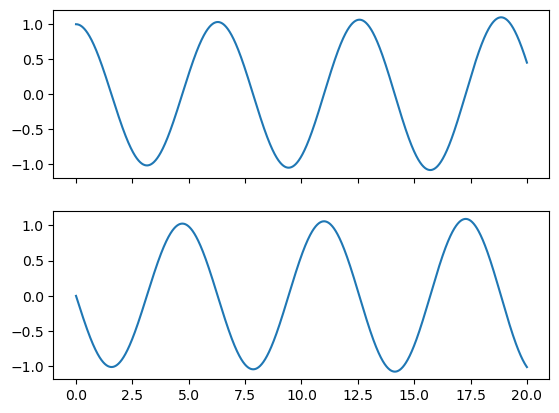

In [76]:
# Step 5: plot the solution

#TODO
fig,axes = plt.subplots(2,1,sharex=True)
axes[0].plot(time,sol[0,:],label = 'x')
axes[1].plot(time,sol[1,:],label = 'v')
#axes[2].plot(time,sol[2,:],label = 'a')

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

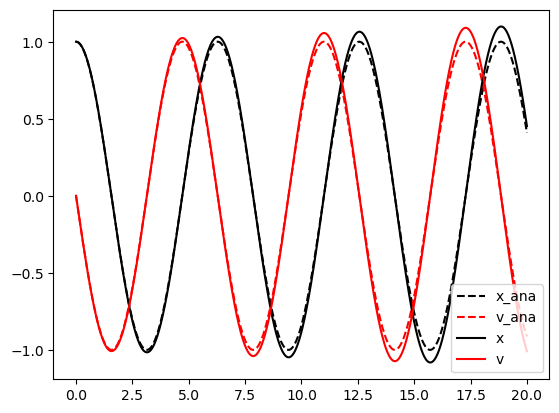

In [62]:
# Step 6: evaluate the analytical solution and plot it

# TODO
def x_ana(t,phi = 0):
    return A*np.cos(omega0*t+phi)

def v_ana(t,delta = 0):
    return -A*omega0*np.sin(omega0*t+delta)

plt.plot(time,x_ana(time),label = 'x_ana',ls = '--',c = 'k')
plt.plot(time,v_ana(time),label = 'v_ana',ls = '--',c = 'r')
plt.plot(time,sol[0,:],label = 'x',c = 'k')
plt.plot(time,sol[1,:],label = 'v',c = 'r')
plt.legend()


Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

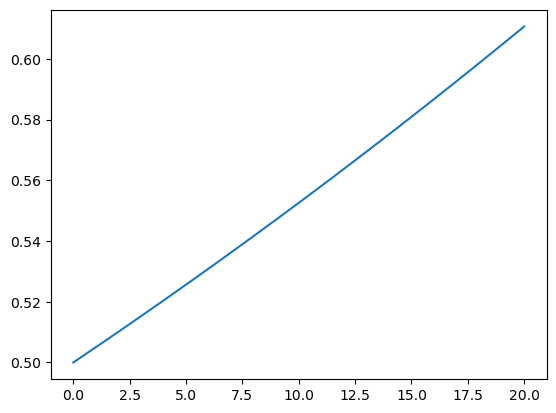

In [63]:
# Step 7: evaluate the energy (error) of the system

# TODO 
etot = 0.5*(sol[0,:]**2+sol[1,:]**2)
plt.plot(time,etot)


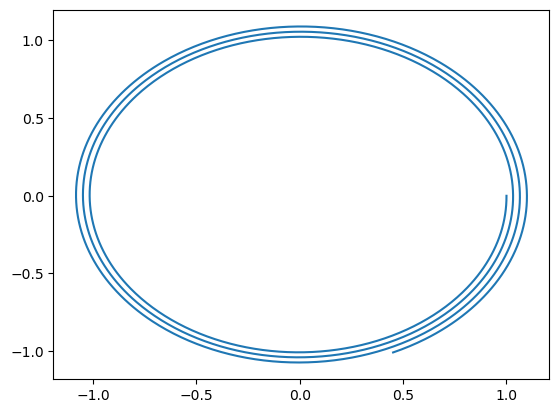

In [64]:
# Step 8: evaluate the phase space

# TODO
plt.plot(sol[0,:],sol[1,:])



## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

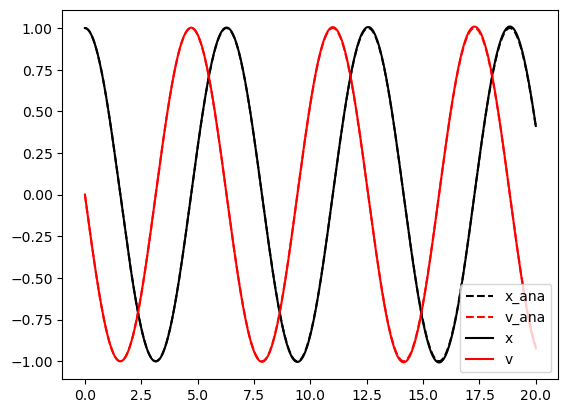

In [67]:
# TODO

time_ex2,sol_ex2 = euler(y,dt=0.001)
plt.plot(time_ex2,x_ana(time_ex2),label = 'x_ana',ls = '--',c = 'k')
plt.plot(time_ex2,v_ana(time_ex2),label = 'v_ana',ls = '--',c = 'r')
plt.plot(time_ex2,sol_ex2[0,:],label = 'x',c = 'k')
plt.plot(time_ex2,sol_ex2[1,:],label = 'v',c = 'r')
plt.legend()


### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 